In [17]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [18]:
# reload helper and methods for when things change
reload(m);
reload(h);

### Generate Data

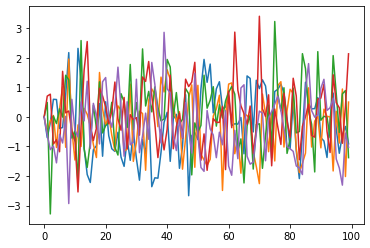

In [19]:
T, n, s = 100, 5, 5

W_true = h.generate_A(n, s, low = 0.3, high = 0.5)

for i in range(n):
    W_true[i][i] = np.abs(W_true[i][i])

X = h.generate_var_2(T, n, W_true, np.identity(n))
plt.plot(X);

### Auxilliary functions

In [20]:
import scipy.linalg as slin

def h_var(W):
    """Evaluate value and gradient of acyclicity constraint."""
    V = W * W-np.diag(np.diag(W * W))
    E = slin.expm(V * V)
    h = np.trace(E) - n
    
    return h

In [21]:
def hamming_distance(W1, W2):
    """Computes Structured Hamming Distance"""
    W1_bin = W1 != 0
    W2_bin = W2 != 0
    
    return np.sum(np.where(W1_bin != W2_bin))

### Compare OLS and NOTEARS

In [22]:
mses, hs, hds = [], [], []

for T in range(50, 1001, 50):
    
    # generate data
    X = h.generate_var_2(T, n, W_true, np.identity(n))
    
    # NOTEARS
    W_NT, h_val = m._notears_2(X, w_threshold = 0.0)
    
    # OLS
    W_OLS = m._OLS(X)
    
    mses.append([h.MSE(W_OLS, X), h.MSE(W_NT, X)])
    hs.append([h_var(W_OLS), h_val])
    hds.append([hamming_distance(W_true, W_OLS), hamming_distance(W_true, W_NT)])
    
#     print(np.round(W_OLS, 3))
#     print(np.round(W_NT, 3))

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


ValueError: x and y must have same first dimension, but have shapes (96,) and (20, 2)

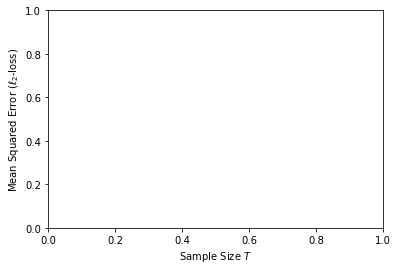

In [23]:
plt.xlabel(r"Sample Size $T$")
plt.ylabel(r"Mean Squared Error ($\ell_2$-loss)")
plots = plt.plot(range(50, 1001, 10), mses)
plt.legend(plots, ["OLS", "NOTEARS"])
plt.show()

plt.xlabel(r"Sample Size $T$")
plt.ylabel("DAG-ness (log-scale)")
plots = plt.plot(range(50, 1001, 10), np.log10(hs))
plt.legend(plots, ["OLS", "NOTEARS (gap indicates flat 0)"])
plt.show()
# plt.xlabel(r"Sample Size $T$")
# plt.ylabel("Hamming Distance")
# plt.plot(range(50, 1001, 50), hds)

### Compare OLS and NOTEARS, model mismatch

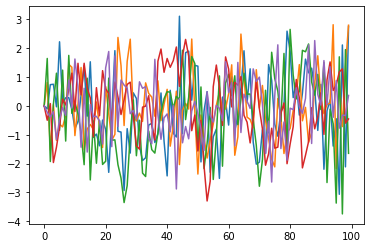

In [10]:
T, n, s = 100, 5, 5

W_true = h.generate_A(n, s, low = 0.3, high = 0.5)

for i in range(n):
    W_true[i][i] = np.abs(W_true[i][i])

W_true[0][2] = 0.6
W_true[2][0] = 0.6

X = h.generate_var_2(T, n, W_true, np.identity(n))
plt.plot(X);

In [13]:
mses, hs, hds = [], [], []

for T in range(50, 1001, 25):
    print(T, end = ', ')
    
    # generate data
    X = h.generate_var_2(T, n, W_true, np.identity(n))
    
    # NOTEARS
    W_NT, h_val = m._notears_2(X, w_threshold = 0.0)
    
    # OLS
    W_OLS = m._OLS(X)
    
    mses.append([h.MSE(W_OLS, X), h.MSE(W_NT, X)])
    hs.append([h_var(W_OLS), h_val])
    hds.append([hamming_distance(W_true, W_OLS), hamming_distance(W_true, W_NT)])
    
#     print(np.round(W_OLS, 3))
#     print(np.round(W_NT, 3))

50, 75, 100, 125, 150, 175, 

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000, 

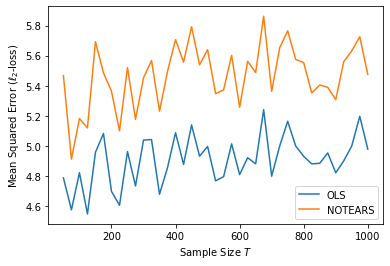

C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


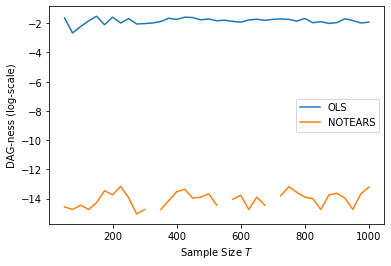

In [16]:
plt.xlabel(r"Sample Size $T$")
plt.ylabel(r"Mean Squared Error ($\ell_2$-loss)")
plots = plt.plot(range(50, 1001, 25), mses)
plt.legend(plots, ["OLS", "NOTEARS"])
plt.show()

plt.xlabel(r"Sample Size $T$")
plt.ylabel("DAG-ness (log-scale)")
plots = plt.plot(range(50, 1001, 25), np.log10(hs))
plt.legend(plots, ["OLS", "NOTEARS"])
plt.show()
# plt.xlabel(r"Sample Size $T$")
# plt.ylabel("Hamming Distance")
# plt.plot(range(50, 1001, 50), hds)